In [6]:
# Jypyter notebook specific
%matplotlib inline
from IPython.display import display, HTML

# Standard imports
import logging
import glob
import os

# Dependecy imports
import matplotlib.pyplot as plt

from sklearn.utils import shuffle

import keras.backend.tensorflow_backend as K

K_CONFIG = K.tf.ConfigProto()
K_CONFIG.allow_soft_placement = True
K_CONFIG.gpu_options.allow_growth = True
K.set_session(K.tf.Session(config=K_CONFIG))

# Load log file

In [11]:
im_paths = glob.glob('../sim_traffic_dataset/**/*.png')
im_paths += glob.glob('../sim_traffic_dataset/**/*.jpg')
#print(im_paths)

off = 0
red = 0
green = 0
yellow = 0
unknown = 0

for path in im_paths:
    label = os.path.dirname(path).split('/')[-1]
    print(label)

Unknown
Unknown
Unknown
Unknown
Unknown
Unknown
Unknown
Unknown
Unknown
Unknown
Unknown
Unknown
Unknown
Unknown
Unknown
Unknown
Unknown
Unknown
Unknown
Unknown
Unknown
Unknown
Unknown
Unknown
Unknown
Unknown
Unknown
Unknown
Unknown
Unknown
Unknown
Unknown
Unknown
Unknown
Unknown
Unknown
Unknown
Unknown
Unknown
Unknown
Unknown
Unknown
Unknown
Unknown
Unknown
Unknown
Unknown
Unknown
Unknown
Unknown
Unknown
Unknown
Unknown
Unknown
Unknown
Unknown
Unknown
Unknown
Unknown
Unknown
Unknown
Unknown
Unknown
Unknown
Unknown
Unknown
Unknown
Unknown
Unknown
Unknown
Unknown
Unknown
Unknown
Unknown
Unknown
Unknown
Unknown
Unknown
Unknown
Unknown
Unknown
Unknown
Unknown
Unknown
Unknown
Unknown
Unknown
Unknown
Unknown
Unknown
Unknown
Unknown
Unknown
Unknown
Unknown
Unknown
Unknown
Unknown
Unknown
Unknown
Unknown
Unknown
Unknown
Unknown
Unknown
Unknown
Unknown
Unknown
Unknown
Unknown
Unknown
Unknown
Unknown
Unknown
Unknown
Unknown
Unknown
Unknown
Unknown
Unknown
Unknown
Unknown
Unknown
Unknown
Unknown


In [12]:
#labels = []

#red = 0
#green = 0

for path in im_paths:
    #label = os.path.dirname(path)
    #label = int(os.path.dirname(path).split('/')[-1])
    #label = os.path.dirname(path).split('/')
    #label = int(os.path.dirname(path).split('/')[3])
    #print(label)
    print(path)

../sim_traffic_dataset/Unknown/784.png
../sim_traffic_dataset/Unknown/797.png
../sim_traffic_dataset/Unknown/148.png
../sim_traffic_dataset/Unknown/63.png
../sim_traffic_dataset/Unknown/754.png
../sim_traffic_dataset/Unknown/189.png
../sim_traffic_dataset/Unknown/502.png
../sim_traffic_dataset/Unknown/195.png
../sim_traffic_dataset/Unknown/705.png
../sim_traffic_dataset/Unknown/946.png
../sim_traffic_dataset/Unknown/677.png
../sim_traffic_dataset/Unknown/141.png
../sim_traffic_dataset/Unknown/412.png
../sim_traffic_dataset/Unknown/435.png
../sim_traffic_dataset/Unknown/366.png
../sim_traffic_dataset/Unknown/102.png
../sim_traffic_dataset/Unknown/193.png
../sim_traffic_dataset/Unknown/317.png
../sim_traffic_dataset/Unknown/525.png
../sim_traffic_dataset/Unknown/944.png
../sim_traffic_dataset/Unknown/765.png
../sim_traffic_dataset/Unknown/887.png
../sim_traffic_dataset/Unknown/468.png
../sim_traffic_dataset/Unknown/17.png
../sim_traffic_dataset/Unknown/819.png
../sim_traffic_dataset/Unkn

In [13]:
labels = []

for path in im_paths:
    label = os.path.dirname(path).split('/')[-1]
    if(label == 'Unknown'):
        labels.append(0)
        unknown += 1
        
    if(label == 'Off'):
        labels.append(1)
        off += 1
        
    if(label == 'Red'):
        labels.append(8)
        red += 1
        
    if(label == 'Green'):
        labels.append(2)
        green += 1
        
    if(label == 'Yellow'):
        labels.append(4)
        yellow += 1
        
print('red', red, 'green', green, 'yellow', yellow, 'unknown', unknown, 'off', off)
print(len(im_paths))
print(len(labels))
#print(labels)

('red', 519, 'green', 310, 'yellow', 88, 'unknown', 815, 'off', 0)
1732
1732


# Load images

In [14]:
import cv2
import numpy as np

In [15]:
width = 400
height = 300

images = []

for path in im_paths:

    img = cv2.imread(path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_res = cv2.resize(img, (width, height))
    
    images.append(img_res)

In [16]:
images = np.asarray(images)
print(images.shape, images.dtype)

labels = np.asarray(labels)
print(labels.shape, labels.dtype)

((1732, 300, 400, 3), dtype('uint8'))
((1732,), dtype('int64'))


In [33]:
images, labels = shuffle(images, labels)

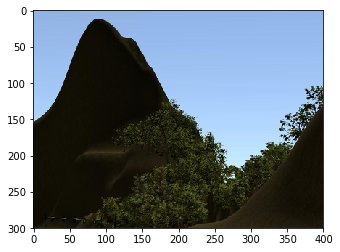

0


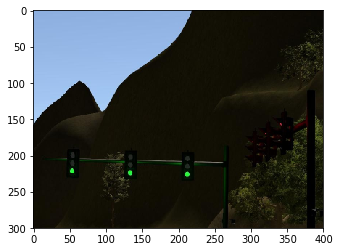

2


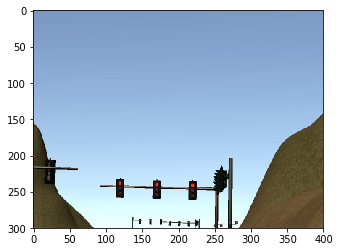

8


In [34]:
plt.imshow(images[777])
plt.show()
print(labels[777])
plt.imshow(images[333])
plt.show()
print(labels[333])
plt.imshow(images[300])
plt.show()
print(labels[300])

# Train model

In [35]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, Dropout
from keras.layers.normalization import BatchNormalization
from keras.optimizers import adam
from keras.utils.data_utils import Sequence

In [36]:
activation = 'relu'
dropout = 1

def model(dshape):
    """Create keras model.

    Based on : https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/
    """
    seq_model = Sequential()

    seq_model.add(BatchNormalization(input_shape=(dshape[0], dshape[1], dshape[2])))
    seq_model.add(Conv2D(24, (5, 5), padding='valid',
                  activation=activation, strides=(2, 2)))

    seq_model.add(Conv2D(36, (5, 5), padding='valid', activation=activation, strides=(2, 2)))
    seq_model.add(Dropout(0.6))
    seq_model.add(Conv2D(48, (5, 5), padding='valid', activation=activation, strides=(2, 2)))
    seq_model.add(Dropout(0.6))
    seq_model.add(Conv2D(64, (3, 3), padding='valid', activation=activation))
    seq_model.add(Dropout(0.6))
    seq_model.add(Conv2D(64, (3, 3), padding='valid', activation=activation))
    seq_model.add(Flatten())
    seq_model.add(Dropout(0.6))
    seq_model.add(Dense(100, activation=activation))
    seq_model.add(Dropout(0.5))
    seq_model.add(Dense(50, activation=activation))
    seq_model.add(Dropout(0.3))
    seq_model.add(Dense(10, activation=activation))
    seq_model.add(Dense(1, activation='sigmoid'))
    seq_model.compile(loss='binary_crossentropy', optimizer=adam(), metrics=['accuracy'])
    seq_model.summary()

    return seq_model

In [37]:
keras_model = model((height, width, 3))  # creates model

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_1 (Batch (None, 300, 400, 3)       12        
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 148, 198, 24)      1824      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 97, 36)        21636     
_________________________________________________________________
dropout_1 (Dropout)          (None, 72, 97, 36)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 47, 48)        43248     
_________________________________________________________________
dropout_2 (Dropout)          (None, 34, 47, 48)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 32, 45, 64)        27712     
__________

In [38]:
keras_model.fit(images, labels, epochs=333, batch_size=32, verbose=1, shuffle=True, validation_split=0.2)

Train on 1385 samples, validate on 347 samples
Epoch 1/333
1385/1385 [==============================] - 101s - loss: -30.2120 - acc: 0.0036 - val_loss: -31.3794 - val_acc: 0.0000e+00
Epoch 2/333
1385/1385 [==============================] - 98s - loss: -31.1826 - acc: 0.0000e+00 - val_loss: -31.3794 - val_acc: 0.0000e+00
Epoch 3/333
1385/1385 [==============================] - 99s - loss: -31.1826 - acc: 0.0000e+00 - val_loss: -31.3794 - val_acc: 0.0000e+00
Epoch 4/333
1385/1385 [==============================] - 97s - loss: -31.1826 - acc: 0.0000e+00 - val_loss: -31.3794 - val_acc: 0.0000e+00
Epoch 5/333
1385/1385 [==============================] - 96s - loss: -31.1826 - acc: 0.0000e+00 - val_loss: -31.3794 - val_acc: 0.0000e+00
Epoch 6/333
1385/1385 [==============================] - 98s - loss: -31.1826 - acc: 0.0000e+00 - val_loss: -31.3794 - val_acc: 0.0000e+00
Epoch 7/333
1385/1385 [==============================] - 97s - loss: -31.1941 - acc: 7.2202e-04 - val_loss: -31.3794 - val

1385/1385 [==============================] - 95s - loss: -31.1826 - acc: 0.0000e+00 - val_loss: -31.3794 - val_acc: 0.0000e+00
Epoch 60/333
1385/1385 [==============================] - 96s - loss: -31.1826 - acc: 0.0000e+00 - val_loss: -31.3794 - val_acc: 0.0000e+00
Epoch 61/333
1385/1385 [==============================] - 95s - loss: -31.1826 - acc: 0.0000e+00 - val_loss: -31.3794 - val_acc: 0.0000e+00
Epoch 62/333
1385/1385 [==============================] - 95s - loss: -31.0089 - acc: 0.0000e+00 - val_loss: -31.3794 - val_acc: 0.0000e+00
Epoch 63/333
1385/1385 [==============================] - 95s - loss: -31.1941 - acc: 7.2202e-04 - val_loss: -31.3794 - val_acc: 0.0000e+00
Epoch 64/333
1385/1385 [==============================] - 95s - loss: -31.1826 - acc: 0.0000e+00 - val_loss: -31.3794 - val_acc: 0.0000e+00
Epoch 65/333
1385/1385 [==============================] - 96s - loss: -31.1826 - acc: 0.0000e+00 - val_loss: -31.3794 - val_acc: 0.0000e+00
Epoch 66/333
1385/1385 [=========

1385/1385 [==============================] - 95s - loss: -31.1826 - acc: 0.0000e+00 - val_loss: -31.3794 - val_acc: 0.0000e+00
Epoch 118/333
1385/1385 [==============================] - 95s - loss: -31.1826 - acc: 0.0000e+00 - val_loss: -31.3794 - val_acc: 0.0000e+00
Epoch 119/333
1385/1385 [==============================] - 95s - loss: -31.1826 - acc: 0.0000e+00 - val_loss: -31.3794 - val_acc: 0.0000e+00
Epoch 120/333
1385/1385 [==============================] - 95s - loss: -31.1826 - acc: 0.0000e+00 - val_loss: -31.3794 - val_acc: 0.0000e+00
Epoch 121/333
1385/1385 [==============================] - 96s - loss: -31.1826 - acc: 0.0000e+00 - val_loss: -31.3794 - val_acc: 0.0000e+00
Epoch 122/333
1385/1385 [==============================] - 96s - loss: -31.1826 - acc: 0.0000e+00 - val_loss: -31.3794 - val_acc: 0.0000e+00
Epoch 123/333
1385/1385 [==============================] - 95s - loss: -31.1826 - acc: 0.0000e+00 - val_loss: -31.3794 - val_acc: 0.0000e+00
Epoch 124/333
1385/1385 [==

1385/1385 [==============================] - 96s - loss: -31.1826 - acc: 0.0000e+00 - val_loss: -31.3794 - val_acc: 0.0000e+00
Epoch 176/333
1385/1385 [==============================] - 95s - loss: -31.1826 - acc: 0.0000e+00 - val_loss: -31.3794 - val_acc: 0.0000e+00
Epoch 177/333
1385/1385 [==============================] - 95s - loss: -31.1826 - acc: 0.0000e+00 - val_loss: -31.3794 - val_acc: 0.0000e+00
Epoch 178/333
1385/1385 [==============================] - 95s - loss: -31.1826 - acc: 0.0000e+00 - val_loss: -31.3794 - val_acc: 0.0000e+00
Epoch 179/333
1385/1385 [==============================] - 95s - loss: -31.1826 - acc: 0.0000e+00 - val_loss: -31.3794 - val_acc: 0.0000e+00
Epoch 180/333
1385/1385 [==============================] - 96s - loss: -31.1826 - acc: 0.0000e+00 - val_loss: -31.3794 - val_acc: 0.0000e+00
Epoch 181/333
1385/1385 [==============================] - 96s - loss: -31.1826 - acc: 0.0000e+00 - val_loss: -31.3794 - val_acc: 0.0000e+00
Epoch 182/333
1385/1385 [==

1385/1385 [==============================] - 95s - loss: -31.1826 - acc: 0.0000e+00 - val_loss: -31.3794 - val_acc: 0.0000e+00
Epoch 234/333
1385/1385 [==============================] - 96s - loss: -31.1826 - acc: 0.0000e+00 - val_loss: -31.3794 - val_acc: 0.0000e+00
Epoch 235/333
1385/1385 [==============================] - 95s - loss: -31.1826 - acc: 0.0000e+00 - val_loss: -31.3794 - val_acc: 0.0000e+00
Epoch 236/333
1385/1385 [==============================] - 96s - loss: -31.1826 - acc: 0.0000e+00 - val_loss: -31.3794 - val_acc: 0.0000e+00
Epoch 237/333
1385/1385 [==============================] - 95s - loss: -31.1826 - acc: 0.0000e+00 - val_loss: -31.3794 - val_acc: 0.0000e+00
Epoch 238/333
1385/1385 [==============================] - 96s - loss: -31.1826 - acc: 0.0000e+00 - val_loss: -31.3794 - val_acc: 0.0000e+00
Epoch 239/333
1385/1385 [==============================] - 96s - loss: -31.1826 - acc: 0.0000e+00 - val_loss: -31.3794 - val_acc: 0.0000e+00
Epoch 240/333
1385/1385 [==

1385/1385 [==============================] - 96s - loss: -31.1826 - acc: 0.0000e+00 - val_loss: -31.3794 - val_acc: 0.0000e+00
Epoch 292/333
1385/1385 [==============================] - 96s - loss: -31.1826 - acc: 0.0000e+00 - val_loss: -31.3794 - val_acc: 0.0000e+00
Epoch 293/333
1385/1385 [==============================] - 96s - loss: -31.1826 - acc: 0.0000e+00 - val_loss: -31.3794 - val_acc: 0.0000e+00
Epoch 294/333
1385/1385 [==============================] - 95s - loss: -31.1826 - acc: 0.0000e+00 - val_loss: -31.3794 - val_acc: 0.0000e+00
Epoch 295/333
1385/1385 [==============================] - 96s - loss: -31.1826 - acc: 0.0000e+00 - val_loss: -31.3794 - val_acc: 0.0000e+00
Epoch 296/333
1385/1385 [==============================] - 96s - loss: -31.1826 - acc: 0.0000e+00 - val_loss: -31.3794 - val_acc: 0.0000e+00
Epoch 297/333
1385/1385 [==============================] - 95s - loss: -31.1826 - acc: 0.0000e+00 - val_loss: -31.3794 - val_acc: 0.0000e+00
Epoch 298/333
1385/1385 [==

In [39]:
def save_keras_model(save_model, path):
    """Save keras model to given path."""
    save_model.save_weights(path + 'model.h5')

    with open(path + 'model.json', "w") as text_file:
        text_file.write(save_model.to_json())

    logging.info('Keras json model saved. %s', path + 'model.json')
    logging.info('Keras h5 model saved. %s', path + 'model.h5')

In [40]:
save_keras_model(keras_model, 'keras')

# Test model

In [41]:
from keras.models import model_from_json

In [42]:
model_path = 'kerasmodel'

In [43]:
inf_model = model_from_json(open(model_path + '.json','r').read())
inf_model.load_weights(model_path + '.h5')

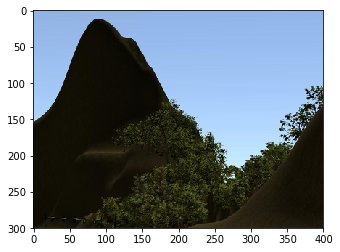

0


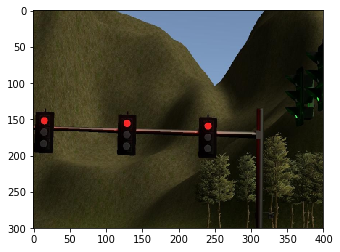

8


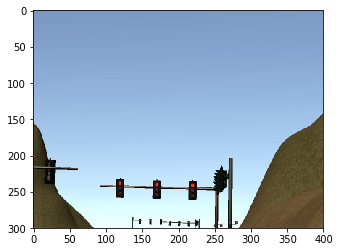

8


In [44]:
plt.imshow(images[777])
plt.show()
print(labels[777])
plt.imshow(images[600])
plt.show()
print(labels[600])
plt.imshow(images[300])
plt.show()
print(labels[300])

In [45]:
print(round(inf_model.predict(np.expand_dims(images[777], 0))[0, 0]))
print(round(inf_model.predict(np.expand_dims(images[600], 0))[0, 0]))
print(round(inf_model.predict(np.expand_dims(images[300], 0))[0, 0]))

1.0
1.0
1.0
